In [45]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [46]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
Contributions = pd.read_sql('select * from merged_2009', con=engine)
Contributions.head()
Contributions.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
0,2009,260,"William,Thompson, Jr.",2009-09-11,Corporation,New York,NY,10007.0,0.0,0,0.0,0.0,38,Other,Other: explntion
1,2009,260,"William,Thompson, Jr.",2007-06-14,Corporation,New York,NY,10007.0,0.0,0,0.0,0.0,49,Other,Other: explntion
2,2009,1286,"Kevin,Coenen",2009-03-16,Limited Liability Company,New York,NY,10106.0,0.0,0,0.0,0.0,30,Other,Other: explntion
3,2009,1286,"Kevin,Coenen",2009-03-23,Limited Liability Company,New York,NY,10106.0,0.0,0,0.0,0.0,30,Other,Other: explntion
5,2009,260,"William,Thompson, Jr.",2008-03-06,Corporation,New York,NY,10022.0,0.0,0,0.0,0.0,962,Fundraising,Fundraising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,2009,605,"Michael,Bloomberg",2009-12-23,Individual,New York,NY,10028.0,0.0,0,0.0,0.0,12750,Campaign Workers Salaries,Campgn Wrkrs $$
9708,2009,605,"Michael,Bloomberg",2009-07-15,Individual,New York,NY,10028.0,0.0,0,0.0,0.0,3750,Campaign Workers Salaries,Campgn Wrkrs $$
9709,2009,605,"Michael,Bloomberg",2009-10-29,Individual,New York,NY,10028.0,0.0,0,0.0,0.0,3750,Campaign Workers Salaries,Campgn Wrkrs $$
9710,2009,605,"Michael,Bloomberg",2009-11-16,Corporation,Brooklyn,NY,11208.0,0.0,0,0.0,0.0,375,Other,Other: explntion


In [47]:
Contributions_df = Contributions.drop(columns=['election','prevamt'])
total_groupby = Contributions_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
Contributions_df['zipcode'] = Contributions_df['zipcode'].apply(str)

In [26]:
Contributions_df = Contributions_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount')

In [27]:
Contributions_df.head()

amount  \
zipcode date       contributiontype           city     state           
10001.0 2006-03-02 Corporation                New York NY        0.0   
        2006-09-05 Corporation                New York NY        0.0   
        2006-10-07 Political Action Committee New York NY     2000.0   
        2006-10-16 Corporation                New York NY        0.0   
        2006-10-23 Limited Liability Company  New York NY     2000.0   

                                                              matchamt  \
zipcode date       contributiontype           city     state             
10001.0 2006-03-02 Corporation                New York NY            0   
        2006-09-05 Corporation                New York NY            0   
        2006-10-07 Political Action Committee New York NY            0   
        2006-10-16 Corporation                New York NY            0   
        2006-10-23 Limited Liability Company  New York NY            0   

                                                              totalamount  \
zipcode date       contributiontype           city     state                
10001.0 2006-03-02 Corporation                New York NY             0.0   
        2006-09-05 Corporation                New York NY             0.0   
        2006-10-07 Political Action Committee New York NY          2000.0   
        2006-10-16 Corporation                New York NY             0.0   
        2006-10-23 Limited Liability Company  New York NY          2000.0   

                                                              expenditure_amount  
zipcode date       contributiontype           city     state                      
10001.0 2006-03-02 Corporation                New York NY                    298  
        2006-09-05 Corporation                New York NY                   1500  
        2006-10-07 Political Action Committee New York NY                      0  
        2006-10-16 Corporation                New York NY                    125  
        2006-10-23 Limited Liability Company  New York NY                      0

In [28]:
Contributions_df = Contributions_df.reset_index()
Contributions_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,10001.0,2006-03-02,Corporation,New York,NY,0.0,0,0.0,298
1,10001.0,2006-09-05,Corporation,New York,NY,0.0,0,0.0,1500
2,10001.0,2006-10-07,Political Action Committee,New York,NY,2000.0,0,2000.0,0
3,10001.0,2006-10-16,Corporation,New York,NY,0.0,0,0.0,125
4,10001.0,2006-10-23,Limited Liability Company,New York,NY,2000.0,0,2000.0,0
...,...,...,...,...,...,...,...,...,...
15425,nan,2009-11-05,Corporation,New York,NY,0.0,0,0.0,137
15426,nan,2009-11-25,Individual,Brooklyn,NY,0.0,0,0.0,100
15427,nan,2009-12-07,Individual,Brooklyn,NY,0.0,0,0.0,200
15428,nan,2009-12-14,Other,Staten Island,NY,0.0,0,0.0,1000


In [29]:
from sklearn.preprocessing import LabelEncoder
Contributions_df_enc = Contributions_df.copy()
le = LabelEncoder()
Contributions_df_enc['date'] = le.fit_transform(Contributions_df['date'])
Contributions_df_enc['contributiontype'] = le.fit_transform(Contributions_df['contributiontype'])
Contributions_df_enc['city'] = le.fit_transform(Contributions_df['city'])
# Contributions_df_enc['Amount'] = le.fit_transform(Contributions_df['Amount'])
Contributions_df_enc['state'] = le.fit_transform(Contributions_df['state'])
Contributions_df_enc['zipcode'] = le.fit_transform(Contributions_df['zipcode'])
# Contributions_df_enc['MatchAmt'] = le.fit_transform(Contributions_df['MatchAmt'])
# Contributions_df_enc[features] = scaler.fit_transform(Contributions_df_enc[features])
Contributions_df_enc.head()

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,11,3,621,39,0.0,0,0.0,298
1,0,78,3,621,39,0.0,0,0.0,1500
2,0,98,10,621,39,2000.0,0,2000.0,0
3,0,100,3,621,39,0.0,0,0.0,125
4,0,103,6,621,39,2000.0,0,2000.0,0


In [30]:
X = Contributions_df_enc.drop('totalamount',axis = 1)
y = Contributions_df_enc['totalamount']
Contributions_df_enc.nunique()

zipcode               1648
date                   841
contributiontype        11
city                  1444
state                   59
amount                 522
matchamt               273
totalamount            788
expenditure_amount    2663
dtype: int64

In [31]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [33]:
regr = RandomForestRegressor()

In [34]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
y_pred = regr.predict(X_test)
print(len(y_pred))

4629


In [36]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.9777981202194932


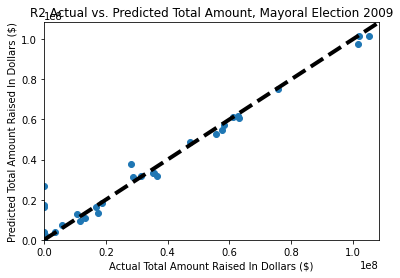

In [37]:
# %matplotlib inline
print(r_squared)
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2 Actual vs. Predicted Total Amount, Mayoral Election 2009')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('../Resources/Predicted_Total_Amount_Regression_2005.png')

In [38]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred
# pred_df.groupby('ZipCode').sum('Predicted Total Amount').head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
pred_df.isnull().sum()

zipcode                   0
date                      0
contributiontype          0
city                      0
state                     0
amount                    0
matchamt                  0
expenditure_amount        0
Predicted Total Amount    0
dtype: int64

In [40]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [41]:
# pred_graph = pred_graph.reset_index()
pred_graph

,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Predicted Total Amount
zipcode,,,,,,,,
289,91,13,248,78,0.0,0,2126,0.000000e+00
786,641,3,246,46,0.0,0,2539,0.000000e+00
1449,1280,6,628,70,0.0,0,11656,0.000000e+00
98,791,4,117,39,0.0,0,90,0.000000e+00
323,2134,12,801,117,0.0,0,2967,0.000000e+00
...,...,...,...,...,...,...,...,...
20,27626,210,31671,1989,80495.0,7295,159112,4.832942e+06
353,829,1,556,39,10000.0,0,0,1.611705e+07
668,17541,77,24575,250,9900.0,0,18261624,1.726760e+07


In [42]:
outcome = {'Test':y_test,'Predictions':y_pred}

In [43]:
outcome_df = pd.DataFrame(data=outcome)

In [44]:
outcome_df

,Test,Predictions
4209,50.0,72.85
5690,350.0,315.78
8234,0.0,0.00
7429,0.0,0.00
2121,175.0,221.98
...,...,...
3236,350.0,358.17
9512,0.0,0.00
5146,0.0,0.00
11773,0.0,0.00
